# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import and cleaning
### Check if columns are the same in all files

In [3]:
starting_month = 7
starting_year = 2020
n_files = 12

for i in range(n_files):
    month = (starting_month + i) % 12 + 1
    year = starting_year + ((starting_month + i) // 12)
    month = str(month)
    if len(month) < 2:
        month = "0" + month
    else:
        pass
#     print(f"{year}{month}-divvy-tripdata.csv")
    df_temp = pd.read_parquet(f"data/{year}{month}-divvy-tripdata.parquet")
    print("file", i+1, "columns:", df_temp.columns.tolist())

file 1 columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
file 2 columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
file 3 columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
file 4 columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
file 5 columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'en

All columns are the same which means that the data can be concatenated.
### Concatenate files

In [4]:
starting_month = 7
starting_year = 2020
n_files = 12

df_bikes = pd.DataFrame()

for i in range(n_files):
    month = (starting_month + i) % 12 + 1
    year = starting_year + ((starting_month + i) // 12)
    month = str(month)
    if len(month) < 2:
        month = "0" + month
    else:
        pass
    df_temp = pd.read_parquet(f"data/{year}{month}-divvy-tripdata.parquet")
    df_bikes = pd.concat([df_bikes, df_temp])

In [5]:
df_bikes.shape

(4731081, 13)

In [6]:
df_bikes.sample(10, random_state=43)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
153698,48F119A8B9561CBB,electric_bike,2021-06-21 21:04:46,2021-06-21 21:19:16,Ogden Ave & Race Ave,13194,Green St & Randolph St,13053,41.891830,-87.658914,41.883677,-87.648576,member
203053,EE8B096F164D4E3B,classic_bike,2021-03-27 23:27:08,2021-03-27 23:31:24,Wilton Ave & Belmont Ave,TA1307000134,Halsted St & Wrightwood Ave,TA1309000061,41.940180,-87.653040,41.929143,-87.649077,member
186979,6AB2AD4933E171D7,electric_bike,2021-05-17 15:00:02,2021-05-17 15:48:23,Fairbanks St & Superior St,18003,Green St & Madison St,TA1307000120,41.895809,-87.620158,41.881974,-87.648066,casual
297526,120D0AEBA184AF04,docked_bike,2020-08-30 18:19:00,2020-08-30 20:33:15,Buckingham Fountain,2,Buckingham Fountain,2,41.876511,-87.620548,41.876511,-87.620548,casual
353144,B69702AF8CF4421C,docked_bike,2020-09-17 12:31:33,2020-09-17 12:35:56,Southport Ave & Irving Park Rd,318,Southport Ave & Roscoe St,229,41.954177,-87.664358,41.943739,-87.664020,member
402586,D8E9878FAE303EFD,electric_bike,2021-06-19 11:08:55,2021-06-19 11:10:32,None,None,None,None,41.950000,-87.650000,41.950000,-87.650000,casual
406157,9B301D52AC29B099,docked_bike,2020-09-04 14:18:01,2020-09-04 14:43:17,State St & Pearson St,106,Sheffield Ave & Waveland Ave,114,41.897448,-87.628722,41.949399,-87.654529,member
223034,92EEC18455AE219D,classic_bike,2021-06-13 14:24:17,2021-06-13 14:43:44,Ogden Ave & Chicago Ave,TA1305000020,Dayton St & North Ave,13058,41.896362,-87.654061,41.910578,-87.649422,member
317533,2DED5188C6CE64DA,classic_bike,2021-05-20 06:49:59,2021-05-20 07:06:28,Fairbanks Ct & Grand Ave,TA1305000003,Halsted St & North Branch St,KA1504000117,41.891847,-87.620580,41.899368,-87.648480,casual
150701,1A493368198D7EA3,docked_bike,2021-04-17 15:30:59,2021-04-17 16:43:48,Museum of Science and Industry,KA1503000074,Museum of Science and Industry,KA1503000074,41.791728,-87.583945,41.791728,-87.583945,casual


In [7]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4731081 entries, 0 to 822409
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 505.3+ MB


In [8]:
df_bikes.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    369182
start_station_id      369804
end_station_name      407300
end_station_id        407759
start_lat                  0
start_lng                  0
end_lat                 5247
end_lng                 5247
member_casual              0
dtype: int64

It seems as though there are some missing values in case of ```station_id``` columns, however, it is possible that this is due to the fact that the user didn't leave the bike in a station but in open field. It is possible that this is also the case for the latitude (```_lat```) and logitude (```_lng```) columns - perhaps the bikes were left in some place where the location trackers didn't have . Because this is not the topic of this analysis, this will not be explored further.

Sadly, the **data doesn't contain a unique identifier** for each user. If there were a unique ID in the data, it would allow for calculating the sum of rides each user has completed during the year and perhaps find a target group for advertising to convert from casual riders to annual members. This is most important as according to the [divvy website](https://www.divvybikes.com/pricing) a single ride costs 3.30 dollars and an annual membership costs 108 dollars (9 dollars per month). The target group could be single ride users who have completed at least 3 rides per month, and thus, getting an annual membership would be cost-efficient for them.

A few problems which need to be addressed:
- the ```started_at``` and ```ended_at``` columns have to be converted to datetime

To be done:
- check what are unique values for the ```member_casual``` column. Make sure that there are only 2
- calculate length of each ride
- calculate summary statistics for both ```member_casual``` types
- see if there are any trends

In [9]:
df_bikes_cleaned = df_bikes.copy()

df_bikes_cleaned["started_at"] = pd.to_datetime(df_bikes_cleaned["started_at"].str.strip(), errors="coerce")
df_bikes_cleaned["ended_at"] = pd.to_datetime(df_bikes_cleaned["ended_at"].str.strip(), errors="coerce")

Double-check results

In [10]:
df_bikes_cleaned[["started_at", "ended_at"]].isna().sum()

started_at    0
ended_at      0
dtype: int64

In [11]:
df_bikes_cleaned[["started_at", "ended_at"]].sample(5, random_state=13)

,started_at,ended_at
33528,2021-07-24 09:55:19,2021-07-24 09:55:47
304344,2020-08-11 13:48:25,2020-08-11 15:19:10
197675,2020-08-06 01:59:01,2020-08-06 03:05:17
260772,2021-05-28 16:02:42,2021-05-28 16:14:49
249706,2020-08-21 13:58:03,2020-08-21 14:58:16


In [12]:
df_bikes[["started_at", "ended_at"]].sample(5, random_state=13)

,started_at,ended_at
33528,2021-07-24 09:55:19,2021-07-24 09:55:47
304344,2020-08-11 13:48:25,2020-08-11 15:19:10
197675,2020-08-06 01:59:01,2020-08-06 03:05:17
260772,2021-05-28 16:02:42,2021-05-28 16:14:49
249706,2020-08-21 13:58:03,2020-08-21 14:58:16


In [13]:
df_bikes_cleaned["member_casual"].unique()

array(['member', 'casual'], dtype=object)

**There are indeed only two types of users.** No cleaning needed here.

Moving on to calculating **ride duration.**

In [14]:
df_bikes_cleaned["ride_duration"] = df_bikes_cleaned["ended_at"] - df_bikes_cleaned["started_at"]

# convert ride_duration to seconds to allow for calculating summary statistics
df_bikes_cleaned["ride_duration"] = df_bikes_cleaned["ride_duration"].values.astype(np.int64)

In [15]:
df_bikes_cleaned[df_bikes_cleaned["ride_duration"] < 0].shape

(8140, 14)

#### Remove bad data

In [16]:
print(df_bikes_cleaned.shape[0], ": original dataframe observations.")

# remove ride_duration < 0. A ride cannot last negative time
df_bikes_cleaned = df_bikes_cleaned[df_bikes_cleaned["ride_duration"] >= 0]
print(df_bikes_cleaned.shape[0], ": dataframe observations after removing incorrect values of 'ride_duration'")

# remove incorrect values of 'start_station_name'
df_bikes_cleaned = df_bikes_cleaned[df_bikes_cleaned["start_station_name"] != "HQ QR"]
print(df_bikes_cleaned.shape[0], ": dataframe observations after removing incorrect values of 'start_station_name'")

4731081 : original dataframe observations.
4722941 : dataframe observations after removing incorrect values of 'ride_duration'
4722941 : dataframe observations after removing incorrect values of 'start_station_name'


# Data Analysis
### Sumary statistics of ride_duration

In [17]:
df_bikes_stats = df_bikes_cleaned.copy()

# get summary statistics
df_bikes_stats = df_bikes_stats[["member_casual", "ride_duration"]]
df_bikes_stats = df_bikes_stats.groupby("member_casual")
df_bikes_stats = df_bikes_stats.describe()

# re-convert all columns (except for 'count') to datetime format and round to seconds
for col in df_bikes_stats.columns[1:]:
    df_bikes_stats[col] = pd.to_timedelta(df_bikes_stats[col]).dt.round('1s')

df_bikes_stats = df_bikes_stats["ride_duration"]
df_bikes_stats

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2099671.0,0 days 00:36:46,0 days 05:14:58,0 days,0 days 00:10:03,0 days 00:18:00,0 days 00:33:24,38 days 20:24:09
member,2623270.0,0 days 00:14:44,0 days 00:52:09,0 days,0 days 00:06:03,0 days 00:10:30,0 days 00:18:10,23 days 05:01:22


### Weekday-specific summary statistics

In [57]:
df_bikes_weekday = df_bikes_cleaned.copy()
df_bikes_weekday["weekday"] = df_bikes_weekday["started_at"].dt.weekday

# get summary statistics
df_bikes_weekday = df_bikes_weekday[["member_casual", "weekday", "ride_duration"]]
df_bikes_weekday = df_bikes_weekday.groupby(["member_casual", "weekday"])
df_bikes_weekday = df_bikes_weekday.describe()

# re-convert all columns (except for 'count') to datetime format and round to seconds
for col in df_bikes_weekday.columns[1:]:
    df_bikes_weekday[col] = pd.to_timedelta(df_bikes_weekday[col]).dt.round('1s')

df_bikes_weekday = df_bikes_weekday["ride_duration"]
df_bikes_weekday

count            mean             std    min  \
member_casual weekday                                                    
casual        0        229656.0 0 days 00:36:11 0 days 04:27:06 0 days   
              1        223164.0 0 days 00:32:40 0 days 04:04:18 0 days   
              2        231218.0 0 days 00:32:33 0 days 04:57:50 0 days   
              3        231908.0 0 days 00:32:07 0 days 05:06:21 0 days   
              4        302815.0 0 days 00:34:51 0 days 05:33:06 0 days   
              5        488399.0 0 days 00:39:37 0 days 05:26:13 0 days   
              6        392511.0 0 days 00:42:33 0 days 05:59:28 0 days   
member        0        348755.0 0 days 00:14:17 0 days 01:15:33 0 days   
              1        380123.0 0 days 00:13:53 0 days 00:28:58 0 days   
              2        398804.0 0 days 00:14:01 0 days 00:47:41 0 days   
              3        379911.0 0 days 00:13:44 0 days 00:25:19 0 days   
              4        388601.0 0 days 00:14:28 0 days 00:39:16 0 days   
              5        396947.0 0 days 00:16:13 0 days 00:41:06 0 days   
              6        330129.0 0 days 00:16:46 0 days 01:25:15 0 days   

                                  25%             50%             75%  \
member_casual weekday                                                   
casual        0       0 days 00:09:45 0 days 00:17:50 0 days 00:33:47   
              1       0 days 00:09:13 0 days 00:16:12 0 days 00:30:12   
              2       0 days 00:09:05 0 days 00:15:49 0 days 00:28:50   
              3       0 days 00:08:54 0 days 00:15:25 0 days 00:28:11   
              4       0 days 00:09:32 0 days 00:16:42 0 days 00:30:23   
              5       0 days 00:11:17 0 days 00:20:07 0 days 00:36:52   
              6       0 days 00:11:31 0 days 00:21:07 0 days 00:39:50   
member        0       0 days 00:05:48 0 days 00:09:59 0 days 00:17:26   
              1       0 days 00:05:52 0 days 00:10:01 0 days 00:17:15   
              2       0 days 00:05:55 0 days 00:10:07 0 days 00:17:16   
              3       0 days 00:05:51 0 days 00:09:58 0 days 00:17:03   
              4       0 days 00:05:58 0 days 00:10:16 0 days 00:17:34   
              5       0 days 00:06:38 0 days 00:11:44 0 days 00:20:14   
              6       0 days 00:06:34 0 days 00:11:47 0 days 00:20:48   

                                   max  
member_casual weekday                   
casual        0       23 days 12:52:04  
              1       27 days 00:42:55  
              2       37 days 16:43:21  
              3       34 days 02:27:09  
              4       38 days 16:11:41  
              5       38 days 20:24:09  
              6       37 days 10:41:36  
member        0       23 days 05:01:22  
              1        5 days 00:23:45  
              2       13 days 03:45:00  
              3        1 days 00:59:57  
              4        8 days 06:17:33  
              5       11 days 11:04:29  
              6       21 days 15:29:36

In [58]:
map_dict = {0: 'Monday',
            1: 'Tuesday',
            2: 'Wednesday',
            3: 'Thursday',
            4: 'Friday',
            5: 'Saturday',
            6: 'Sunday'}

df_bikes_weekday["ratio"] = np.nan
df_bikes_weekday.loc["casual", "ratio"] = df_bikes_weekday.loc["casual", "count"].values \
    / df_bikes_stats.loc["casual", "count"]
df_bikes_weekday.loc["member", "ratio"] = df_bikes_weekday.loc["member", "count"].values \
    / df_bikes_stats.loc["member", "count"]

df_bikes_weekday.reset_index(level=1, inplace=True)
df_bikes_weekday["weekday"] = df_bikes_weekday["weekday"].map(map_dict)
df_bikes_weekday

,weekday,count,mean,std,min,25%,50%,75%,max,ratio
member_casual,,,,,,,,,,
casual,Monday,229656.0,0 days 00:36:11,0 days 04:27:06,0 days,0 days 00:09:45,0 days 00:17:50,0 days 00:33:47,23 days 12:52:04,0.109377
casual,Tuesday,223164.0,0 days 00:32:40,0 days 04:04:18,0 days,0 days 00:09:13,0 days 00:16:12,0 days 00:30:12,27 days 00:42:55,0.106285
casual,Wednesday,231218.0,0 days 00:32:33,0 days 04:57:50,0 days,0 days 00:09:05,0 days 00:15:49,0 days 00:28:50,37 days 16:43:21,0.110121
casual,Thursday,231908.0,0 days 00:32:07,0 days 05:06:21,0 days,0 days 00:08:54,0 days 00:15:25,0 days 00:28:11,34 days 02:27:09,0.110450
casual,Friday,302815.0,0 days 00:34:51,0 days 05:33:06,0 days,0 days 00:09:32,0 days 00:16:42,0 days 00:30:23,38 days 16:11:41,0.144220
casual,Saturday,488399.0,0 days 00:39:37,0 days 05:26:13,0 days,0 days 00:11:17,0 days 00:20:07,0 days 00:36:52,38 days 20:24:09,0.232607
casual,Sunday,392511.0,0 days 00:42:33,0 days 05:59:28,0 days,0 days 00:11:31,0 days 00:21:07,0 days 00:39:50,37 days 10:41:36,0.186939
member,Monday,348755.0,0 days 00:14:17,0 days 01:15:33,0 days,0 days 00:05:48,0 days 00:09:59,0 days 00:17:26,23 days 05:01:22,0.132947
member,Tuesday,380123.0,0 days 00:13:53,0 days 00:28:58,0 days,0 days 00:05:52,0 days 00:10:01,0 days 00:17:15,5 days 00:23:45,0.144904


# Visualizations
### Member ratio pie chart
Percent of user-type rides between 2020-08 and 2021-07

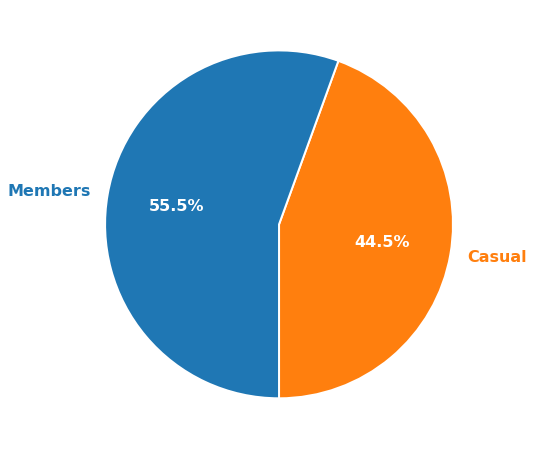

In [74]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Casual', 'Members'
sizes = df_bikes_stats["count"].values.tolist()

plt.figure(figsize=(8, 8))
patches, texts, pcts = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
                               textprops={'fontsize': 16},
                               wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                               colors=["tab:orange", "tab:blue"],
                               startangle=270)
plt.setp(pcts, color='white', fontweight='bold')
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)
# plt.title('Percent of user-type rides between 2020-08 and 2021-07', fontsize=20, loc='left')
plt.show()

### Weekday ratio bar chart
**Weekday ride ratio for casual users**

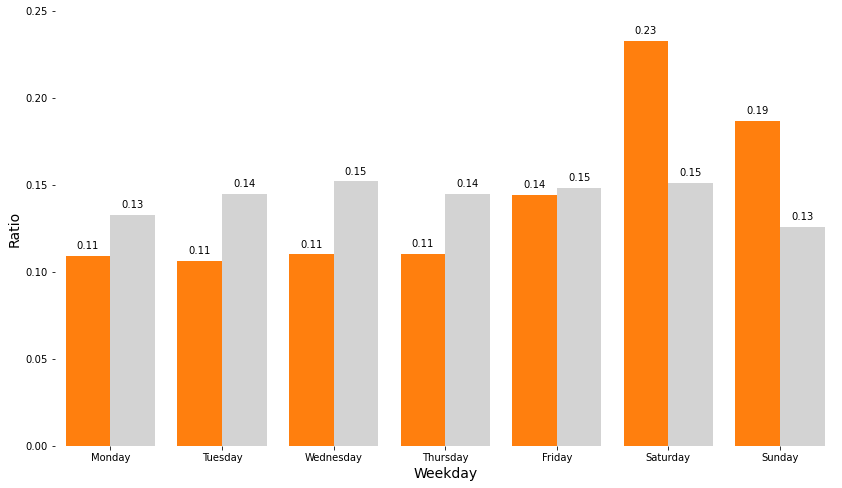

In [131]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x="weekday", y="ratio", hue=df_bikes_weekday.index,
                       palette=["tab:orange", "lightgrey"], saturation=1, data=df_bikes_weekday)
for i in range(len(bar_plot.patches)):
    p = bar_plot.patches[i]
    bar_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.ylim([0, 0.25])
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
# plt.title('Ratio of weekday user type rides between 2020-08 and 2021-07', fontsize=20)
vals = bar_plot.get_yticks()
sns.despine(bottom = True, left = True)
plt.legend('',frameon=False)
plt.show()

**Weekday ride ratio for members**

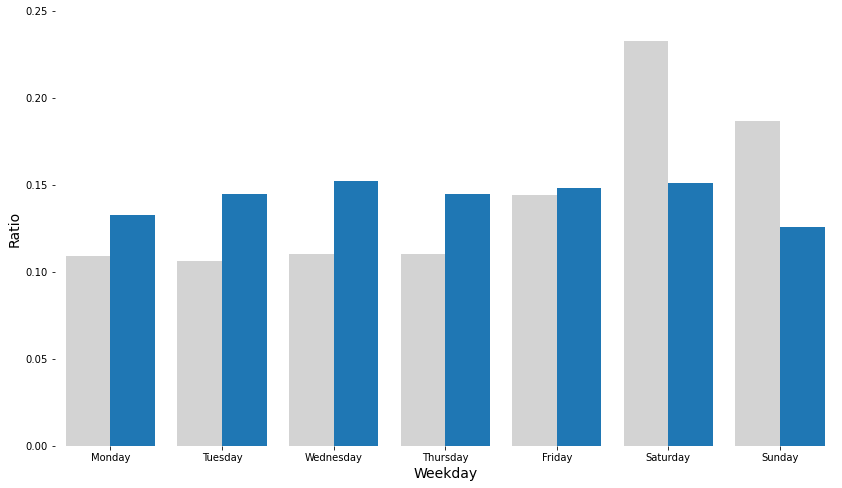

In [130]:
plt.figure(figsize=(14, 8))
sns.barplot(x="weekday", y="ratio", hue=df_bikes_weekday.index,
            palette=["lightgrey", "tab:blue"], saturation=1, data=df_bikes_weekday)
plt.ylim([0, 0.25])
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
# plt.title('Ratio of weekday user type rides between 2020-08 and 2021-07', fontsize=20)
vals = bar_plot.get_yticks()
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine(bottom = True, left = True)
plt.legend('',frameon=False)
plt.show()